# Linear Bivariate BMM with SAMBA toy models : cdf mixing

The best way to learn Taweret is to use it. You can run, modify and experiment with this notebook [here.](https://mybinder.org/v2/gh/danOSU/Taweret/c2d8fd3ce3d74a5891d51adb5afc0afa0b503127?urlpath=lab%2Ftree%2Fdocs%2Fsource%2Fnotebooks%2FLinear_BMM_with_cdf_function_for_SAMBA_models.ipynb)


This notebook shows how to use the Bayesian model mixing package **Taweret** for a toy problem. 

**Author : Dan Liyanage**

Date : 11/10/2022

More about SAMBA toy models can be found in [Uncertainties here, there, and everywhere: interpolating between small- and large-g expansions using Bayesian Model Mixing](https://arxiv.org/abs/2206.04116)



In [1]:
import sys

# You will have to change the following imports depending on where you have 
# the packages installed

# If using binder please uncomment the followings.
sys.path.append("/home/jovyan/")
sys.path.append("/home/jovyan/subpackages/SAMBA")

#sys.path.append("/Users/dananjayaliyanage/git/Taweret")
#sys.path.append("/Users/dananjayaliyanage/git/Taweret/subpackages/SAMBA")

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
# To define priors. (uncoment if not using default priors)
import bilby

# For other operations
import numpy as np

## 1. Get toy models and the pseudo-experimental data

In [2]:
# Toy models from SAMBA
from Taweret.models import samba_models as toy_models

m1 = toy_models.loworder(2, 'uninformative')
m2 = toy_models.highorder(2, 'uninformative')
truth = toy_models.true_model()
exp = toy_models.exp_data()

In [3]:
g = np.linspace(0.1, 0.6, 10)
plot_g = np.linspace(0.01,1,100)
m1_prediction = m1.evaluate(plot_g)
m2_prediction = m2.evaluate(plot_g)
true_output = truth.evaluate(plot_g)
exp_data= exp.evaluate(g,error = 0.01)

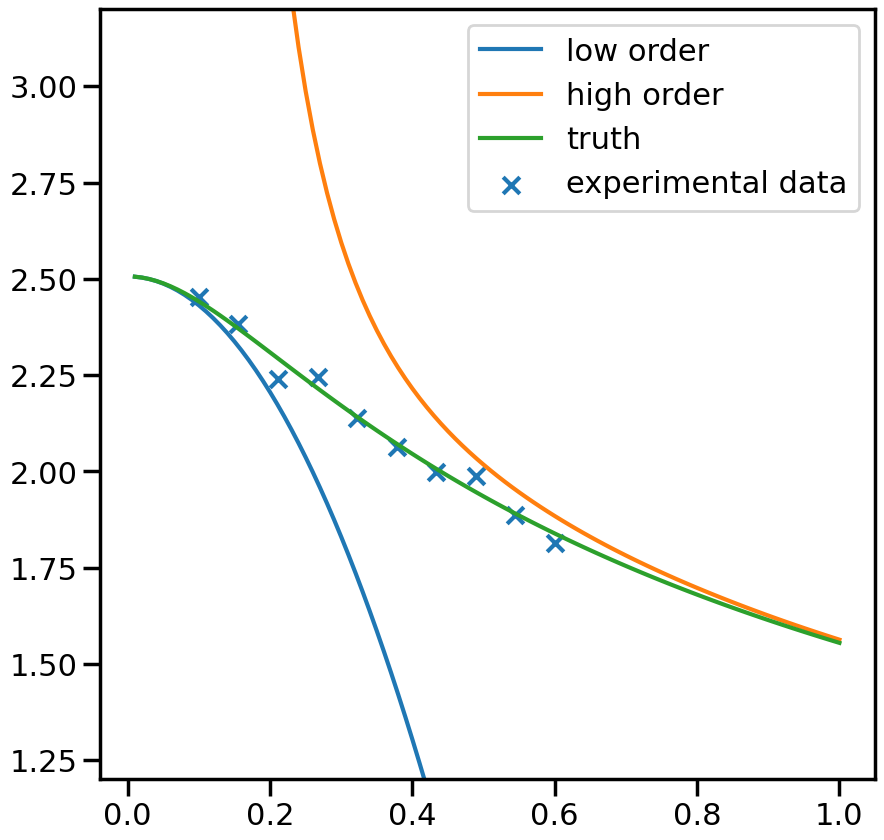

In [4]:

fig, ax_f = plt.subplots(figsize=(10,10))
ax_f.plot(plot_g, m1_prediction[0].flatten(), label='low order')
ax_f.plot(plot_g, m2_prediction[0].flatten(), label='high order')
ax_f.plot(plot_g, true_output[0], label='truth')
ax_f.scatter(g,exp_data[0], marker='x', label='experimental data')
ax_f.set_ylim(1.2,3.2)
ax_f.legend()

##  2. Choose a Mixing method

In [5]:
# Mixing method
from Taweret.mix.bivariate_linear import BivariateLinear as BL

models= {'low_order':m1,'high_order':m2}
mix_model = BL(models_dic=models, method='cdf') 

cdf mixing function has 2 free parameter(s)
To change the prior use `set_prior` method


In [6]:
#uncoment to change the prior from the default
priors = bilby.core.prior.PriorDict()
priors['cdf_0'] = bilby.core.prior.Uniform(-20,20, name="cdf_0")
priors['cdf_1'] = bilby.core.prior.Uniform(-20,20, name="cdf_1")
mix_model.set_prior(priors)

{'cdf_0': Uniform(minimum=-20, maximum=20, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Uniform(minimum=-20, maximum=20, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)}

## 3. Train to find posterior

In [7]:
mix_model.prior

{'cdf_0': Uniform(minimum=-20, maximum=20, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None),
 'cdf_1': Uniform(minimum=-20, maximum=20, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)}

In [8]:
result = mix_model.train(x_exp=g, y_exp=exp_data[0], y_err=exp_data[1],outdir = 'outdir/samba_bivariate', label='cdf_mix')

10:31 bilby INFO    : Running for label 'cdf_mix', output will be saved to 'outdir/samba_bivariate'
10:31 bilby INFO    : Search parameters:
10:31 bilby INFO    :   cdf_0 = Uniform(minimum=-20, maximum=20, name='cdf_0', latex_label='cdf_0', unit=None, boundary=None)
10:31 bilby INFO    :   cdf_1 = Uniform(minimum=-20, maximum=20, name='cdf_1', latex_label='cdf_1', unit=None, boundary=None)
10:31 bilby INFO    : Single likelihood evaluation took 7.861e-04 s
10:31 bilby WARNING : Supplied argument 'printdt' not an argument of 'Ptemcee', removing.
10:31 bilby INFO    : Using sampler Ptemcee with kwargs {'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'betas': None, 'a': 2.0, 'adaptation_lag': 10000, 'adaptation_time': 100, 'random': None, 'adapt': False, 'swap_ratios': False}
10:31 bilby INFO    : Using convergence inputs: ConvergenceInputs(autocorr_c=5, autocorr_tol=50, autocorr_tau=1, gradient_tau=0.1, gradient_mean_log_posterior=0.1, Q_tol=1.02, safety=1, burn_in_nact=50, burn_in_fixed_disca

The following Default settings for sampler will be used. You can changethese arguments by providing kwargs_for_sampler argement in `train`.Check Bilby documentation for other sampling options.
{'sampler': 'ptemcee', 'ntemps': 5, 'nwalkers': 20, 'Tmax': 100, 'burn_in_fixed_discard': 200, 'nsamples': 5000, 'threads': 6, 'printdt': 60}


10:31 bilby INFO    : Generating pos0 samples
10:31 bilby INFO    : Starting to sample


1|0:00:00|nc:5.0e+02|a0:0.00-0.80|swp:0.42-0.98|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.32ms/ev
2|0:00:00|nc:1.0e+03|a0:0.10-0.80|swp:0.33-0.98|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.34ms/ev
3|0:00:00|nc:1.5e+03|a0:0.27-0.80|swp:0.30-0.98|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.35ms/ev
4|0:00:00|nc:2.0e+03|a0:0.40-0.85|swp:0.31-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.33ms/ev
5|0:00:00|nc:2.5e+03|a0:0.44-0.88|swp:0.29-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.31ms/ev
6|0:00:00|nc:3.0e+03|a0:0.43-0.80|swp:0.30-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.26ms/ev
7|0:00:01|nc:3.5e+03|a0:0.46-0.71|swp:0.32-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.27ms/ev
8|0:00:01|nc:4.0e+03|a0:0.47-0.75|swp:0.32-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.29ms/ev
9|0:00:01|nc:4.5e+03|a0:0.47-0.78|swp:0.33-0.97|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.30ms/ev
10|0:00:01|nc:5.0e+03|a0:0.50-0.74|swp:0.34-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.29ms/ev
11|0:00:01|nc:5.5e+03|a0:0.51-0.75|swp:0.35-0.96|n:nan<5000|t!nan(+nan,+nan)|q:

90|0:00:12|nc:4.5e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
91|0:00:12|nc:4.6e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
92|0:00:12|nc:4.6e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
93|0:00:12|nc:4.6e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
94|0:00:12|nc:4.7e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
95|0:00:12|nc:4.8e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
96|0:00:12|nc:4.8e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
97|0:00:12|nc:4.8e+04|a0:0.62-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
98|0:00:13|nc:4.9e+04|a0:0.61-0.69|swp:0.40-0.96|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.21ms/ev
99|0:00:13|nc:5.0e+04|a0:0.61-0.69|swp:0.40-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
100|0:00:13|nc:5.0e+04|a0:0.61-0.69|swp:0.40-0.95|n:nan<5000|t!nan(+na

178|0:00:22|nc:8.9e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
179|0:00:22|nc:9.0e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
180|0:00:22|nc:9.0e+04|a0:0.63-0.67|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
181|0:00:23|nc:9.0e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.22ms/ev
182|0:00:23|nc:9.1e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.23ms/ev
183|0:00:23|nc:9.2e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.25ms/ev
184|0:00:23|nc:9.2e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.26ms/ev
185|0:00:23|nc:9.2e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.25ms/ev
186|0:00:23|nc:9.3e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.25ms/ev
187|0:00:23|nc:9.4e+04|a0:0.63-0.68|swp:0.41-0.95|n:nan<5000|t!nan(+nan,+nan)|q:inf|0.25ms/ev
188|0:00:23|nc:9.4e+04|a0:0.63-0.67|swp:0.41-0.95|n:nan<5000

265|0:00:33|nc:1.3e+05|a0:0.63-0.67|swp:0.41-0.95|n:-100<5000|t!1(+nan,+0.04)|q:1.01|0.23ms/ev
266|0:00:33|nc:1.3e+05|a0:0.63-0.67|swp:0.41-0.95|n:-80<5000|t!1(+nan,+0.04)|q:1.00|0.23ms/ev
267|0:00:33|nc:1.3e+05|a0:0.63-0.67|swp:0.41-0.95|n:-60<5000|t!1(+nan,+0.04)|q:1.00|0.23ms/ev
268|0:00:33|nc:1.3e+05|a0:0.63-0.67|swp:0.41-0.95|n:-40<5000|t!1(+nan,+0.04)|q:1.00|0.23ms/ev
269|0:00:33|nc:1.3e+05|a0:0.63-0.67|swp:0.41-0.95|n:-20<5000|t!1(+nan,+0.04)|q:1.00|0.23ms/ev
270|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:0<5000|t!1(+nan,+0.04)|q:1.00|0.22ms/ev
271|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:20<5000|t!1(+nan,+0.04)|q:1.00|0.22ms/ev
272|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:40<5000|t!1(+nan,+0.04)|q:1.00|0.22ms/ev
273|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:60<5000|t!1(+nan,+0.04)|q:1.00|0.22ms/ev
274|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:80<5000|t!1(+nan,+0.04)|q:1.00|0.23ms/ev
275|0:00:34|nc:1.4e+05|a0:0.63-0.67|swp:0.41-0.95|n:100<5000|t!1(

352|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:480<5000|t=2(+0.01,+0.02)|q:1.00|0.22ms/ev
353|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:500<5000|t=2(+0.01,+0.02)|q:1.00|0.22ms/ev
354|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:520<5000|t=2(+0.01,+0.03)|q:1.00|0.22ms/ev
355|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:540<5000|t=2(+0.01,+0.07)|q:1.00|0.22ms/ev
356|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:560<5000|t=2(+0.01,+0.08)|q:1.00|0.22ms/ev
357|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:580<5000|t=2(+0.01,+0.08)|q:1.00|0.22ms/ev
358|0:00:43|nc:1.8e+05|a0:0.63-0.67|swp:0.41-0.95|n:600<5000|t=2(+0.01,+0.05)|q:1.00|0.22ms/ev
359|0:00:43|nc:1.8e+05|a0:0.64-0.67|swp:0.41-0.95|n:620<5000|t=2(+0.01,+0.04)|q:1.00|0.22ms/ev
360|0:00:44|nc:1.8e+05|a0:0.64-0.67|swp:0.41-0.95|n:640<5000|t=2(+0.01,+0.08)|q:1.00|0.22ms/ev
361|0:00:44|nc:1.8e+05|a0:0.64-0.67|swp:0.41-0.95|n:660<5000|t=2(+0.01,+0.08)|q:1.00|0.22ms/ev
362|0:00:44|nc:1.8e+05|a0:0.64-0.67|swp:0.41-0.95|

438|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2200<5000|t!2(+0.01,+0.15)|q:1.00|0.24ms/ev
439|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2220<5000|t!2(+0.01,+0.12)|q:1.00|0.23ms/ev
440|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2240<5000|t!2(+0.01,+0.10)|q:1.00|0.23ms/ev
441|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2260<5000|t=2(+0.01,+0.10)|q:1.00|0.23ms/ev
442|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2280<5000|t=2(+0.01,+0.06)|q:1.00|0.23ms/ev
443|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2300<5000|t=2(+0.01,+0.04)|q:1.00|0.23ms/ev
444|0:00:53|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2320<5000|t=2(+0.01,+0.07)|q:1.00|0.23ms/ev
445|0:00:54|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2340<5000|t=2(+0.01,+0.08)|q:1.00|0.22ms/ev
446|0:00:54|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2360<5000|t=2(+0.01,+0.09)|q:1.00|0.23ms/ev
447|0:00:54|nc:2.2e+05|a0:0.64-0.67|swp:0.41-0.95|n:2380<5000|t=2(+0.02,+0.04)|q:1.00|0.23ms/ev
448|0:00:54|nc:2.2e+05|a0:0.64-0.67|swp:

524|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:3920<5000|t!2(+0.00,+0.16)|q:1.00|0.23ms/ev
525|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:3940<5000|t!2(+0.00,+0.11)|q:1.00|0.23ms/ev
526|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:3960<5000|t=2(+0.00,+0.09)|q:1.00|0.23ms/ev
527|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:3980<5000|t=2(+0.00,+0.05)|q:1.00|0.23ms/ev
528|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:4000<5000|t=2(+0.01,+0.06)|q:1.00|0.24ms/ev
529|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:4020<5000|t=2(+0.00,+0.01)|q:1.00|0.24ms/ev
530|0:01:03|nc:2.6e+05|a0:0.64-0.66|swp:0.41-0.95|n:4040<5000|t=2(+0.00,+0.03)|q:1.00|0.23ms/ev
531|0:01:04|nc:2.7e+05|a0:0.64-0.66|swp:0.41-0.95|n:4060<5000|t=2(+0.00,+0.07)|q:1.00|0.22ms/ev
532|0:01:04|nc:2.7e+05|a0:0.64-0.66|swp:0.41-0.95|n:4080<5000|t!2(+0.00,+0.11)|q:1.00|0.22ms/ev
533|0:01:04|nc:2.7e+05|a0:0.64-0.66|swp:0.41-0.95|n:4100<5000|t=2(+0.00,+0.06)|q:1.00|0.22ms/ev
534|0:01:04|nc:2.7e+05|a0:0.64-0.66|swp:

610|0:01:13|nc:3.0e+05|a0:0.64-0.66|swp:0.41-0.95|n:5000<5000|t=2(+0.00,+0.09)|q:1.00|0.24ms/ev
611|0:01:13|nc:3.1e+05|a0:0.64-0.66|swp:0.41-0.95|n:5020<5000|t!2(+0.00,+0.11)|q:1.00|0.24ms/ev
612|0:01:13|nc:3.1e+05|a0:0.64-0.66|swp:0.41-0.95|n:5040<5000|t=2(+0.01,+0.09)|q:1.00|0.23ms/ev


10:32 bilby INFO    : Finished sampling
10:32 bilby INFO    : Writing checkpoint and diagnostics
10:32 bilby INFO    : Finished writing checkpoint
10:32 bilby INFO    : Sampling time: 0:01:13.237287
10:32 bilby INFO    : Summary of results:
nsamples: 5040
ln_noise_evidence:    nan
ln_evidence:  1.192 +/-  2.267
ln_bayes_factor:    nan +/-  2.267



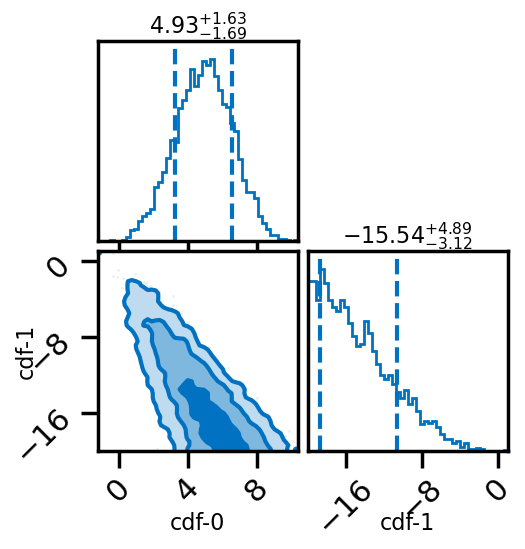

In [9]:
# Posterior of the mixing parameters. 
result.plot_corner()

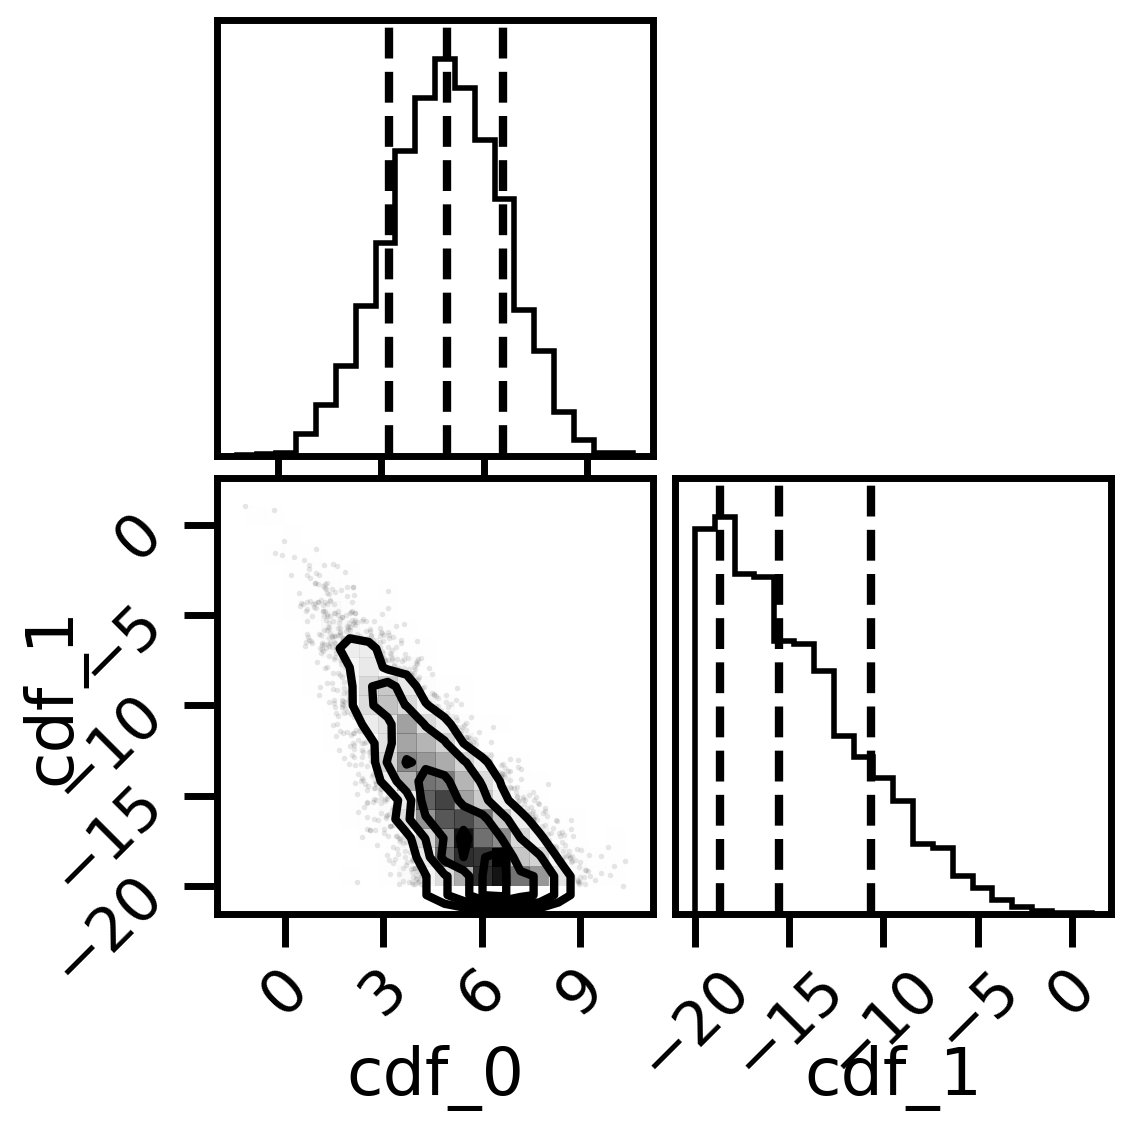

In [10]:
#corner plots
import corner
fig, axs = plt.subplots(2,2, figsize=(6,6), dpi=200)
corner.corner(mix_model.posterior,labels=['cdf_0','cdf_1'],quantiles=[0.16, 0.5, 0.84],fig=fig)
plt.show()

## 4. Predictions

In [11]:
_,mean_prior,CI_prior, _ = mix_model.prior_predict(plot_g, CI=[5,20,80,95])
_,mean,CI, _ = mix_model.predict(plot_g, CI=[5,20,80,95])

(10000, 2)
using provided samples instead of posterior


In [12]:
mean.shape

(1, 100)

In [13]:
per5, per20, per80, per95 = CI
prior5, prior20, prior80, prior95 = CI_prior

In [14]:
# Map value prediction for the step mixing function parameter
map_prediction = mix_model.evaluate(mix_model.map, plot_g)

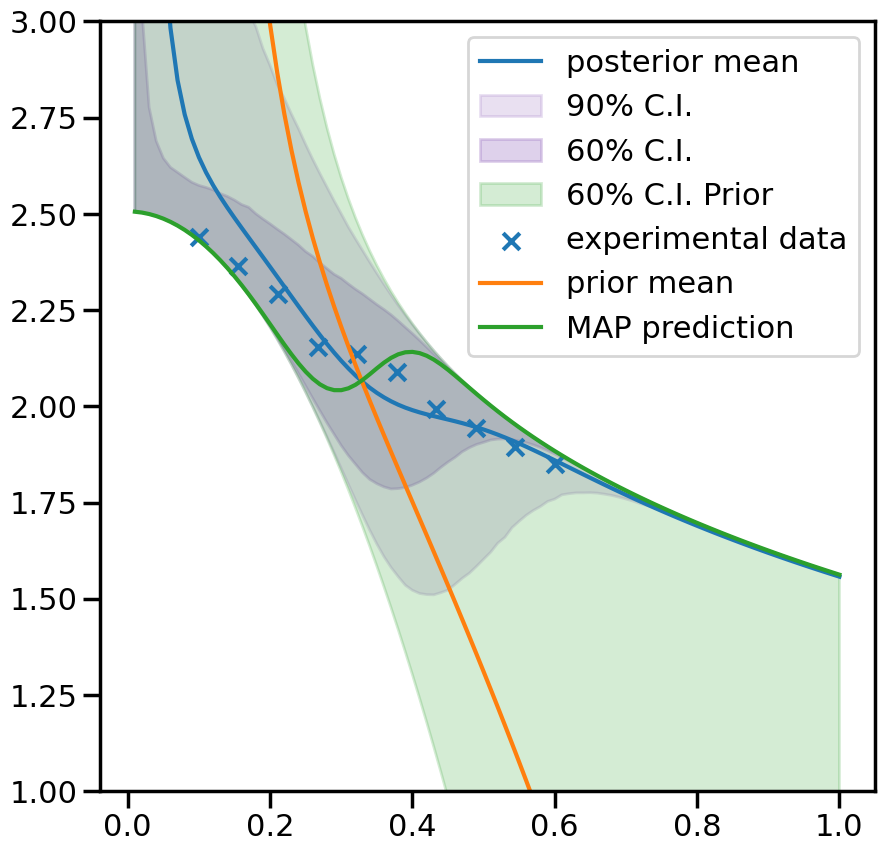

In [15]:
%matplotlib inline
sns.set_context('poster')
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(plot_g, mean.flatten(), label='posterior mean')
ax.fill_between(plot_g,per5.flatten(),per95.flatten(),color=sns.color_palette()[4], alpha=0.2, label='90% C.I.')
ax.fill_between(plot_g,per20.flatten(),per80.flatten(), color=sns.color_palette()[4], alpha=0.3, label='60% C.I.')
ax.fill_between(plot_g,prior20.flatten(),prior80.flatten(),color=sns.color_palette()[2], alpha=0.2, label='60% C.I. Prior')
ax.scatter(g,exp_data[0], marker='x', label='experimental data')
ax.plot(plot_g, mean_prior.flatten(), label='prior mean')
ax.plot(plot_g, map_prediction.flatten(), label='MAP prediction')
ax.set_ybound(1,3)
ax.legend()